# Airport Traffic Visualization geopandas & Plotly✈
To generate a DataFrame from the given URL, we can use the `pandas` package in Python. We will read the CSV file from the URL and display the first 10 rows of the DataFrame.


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AnnetteChiu/airport/main/airports.csv'
url2 = 'https://raw.githubusercontent.com/AnnetteChiu/airport/main/airport-frequencies.csv'
url3 = 'https://raw.githubusercontent.com/AnnetteChiu/airport/main/runways.csv'
url4 = 'https://raw.githubusercontent.com/AnnetteChiu/airport/main/covid_impact_on_airport_traffic.csv'
df = pd.read_csv(url)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

# Display the first 5 rows of the DataFrame airports
df.head(5)

id ident           type                  name  latitude_deg  \
0    6523   00A       heliport     Total RF Heliport     40.070985   
1  323361  00AA  small_airport  Aero B Ranch Airport     38.704022   
2    6524  00AK  small_airport          Lowell Field     59.947733   
3    6525  00AL  small_airport          Epps Airpark     34.864799   
4  506791  00AN  small_airport  Katmai Lodge Airport     59.093287   

   longitude_deg  elevation_ft continent iso_country iso_region  municipality  \
0     -74.933689          11.0       NaN          US      US-PA      Bensalem   
1    -101.473911        3435.0       NaN          US      US-KS         Leoti   
2    -151.692524         450.0       NaN          US      US-AK  Anchor Point   
3     -86.770302         820.0       NaN          US      US-AL       Harvest   
4    -156.456699          80.0       NaN          US      US-AK   King Salmon   

  scheduled_service gps_code iata_code local_code  \
0                no     K00A       NaN        00A   
1                no     00AA       NaN       00AA   
2                no     00AK       NaN       00AK   
3                no     00AL       NaN       00AL   
4                no     00AN       NaN       00AN   

                                           home_link wikipedia_link keywords  
0  https://www.penndot.pa.gov/TravelInPA/airports...            NaN      NaN  
1                                                NaN            NaN      NaN  
2                                                NaN            NaN      NaN  
3                                                NaN            NaN      NaN  
4                                                NaN            NaN      NaN


By using the `pandas` package, we can easily read the CSV file from the given URL and display the first 10 rows of the DataFrame.

In [114]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [116]:
# Display the first 2 rows of the DataFrame airport-frequencies
df2.head(2)

id  airport_ref airport_ident   type description  frequency_mhz
0   70518         6528          00CA   CTAF        CTAF          122.9
1  307581         6589          01FL  ARCAL         NaN          122.9

In [118]:
# Display the first 2 rows of the DataFrame runways
df3.head(3)

id  airport_ref airport_ident  length_ft  width_ft surface  lighted  \
0  269408         6523           00A       80.0      80.0  ASPH-G        1   
1  255155         6524          00AK     2500.0      70.0    GRVL        0   
2  254165         6525          00AL     2300.0     200.0    TURF        0   

   closed le_ident  le_latitude_deg  le_longitude_deg  le_elevation_ft  \
0       0       H1              NaN               NaN              NaN   
1       0        N              NaN               NaN              NaN   
2       0       01              NaN               NaN              NaN   

   le_heading_degT  le_displaced_threshold_ft he_ident  he_latitude_deg  \
0              NaN                        NaN      NaN              NaN   
1              NaN                        NaN        S              NaN   
2              NaN                        NaN       19              NaN   

   he_longitude_deg  he_elevation_ft  he_heading_degT  \
0               NaN              NaN              NaN   
1               NaN              NaN              NaN   
2               NaN              NaN              NaN   

   he_displaced_threshold_ft  
0                        NaN  
1                        NaN  
2                        NaN

In [120]:
# airports groupby iso country and type
df.groupby(['iso_country', 'type']).size()

iso_country  type          
AD           closed              1
             heliport            2
AE           closed              4
             heliport          203
             large_airport       4
                              ... 
ZW           closed              6
             heliport            5
             large_airport       1
             medium_airport      8
             small_airport     135
Length: 988, dtype: int64

In [122]:
# airports
row_count = df.shape[0] # 0 for row
column_count = df.shape[1] # 1 for column
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 78272
Number of columns: 18


In [124]:
pip install geopy -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.douban.com/simple
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [138]:
!pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for psycopg2-binary from https://files.pythonhosted.org/packages/ce/85/62825cabc6aad53104b7b6d12eb2ad74737d268630032d07b74d4444cb72/psycopg2_binary-2.9.9-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.7 MB/s eta 0:00:000:00:010:00:01


In [168]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [174]:
#計算兩個機場距離
import math
# Python 3 program for the
# haversine formula
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# Driver code
if __name__ == "__main__":
    lat1 = 35.289448
    lon1 = 79.79672
    lat2 = 35.290348
    lon2 = 79.796616
     
    print(haversine(lat1, lon1,lat2, lon2), "K.M.")

0.10051960641905637 K.M.


In [189]:
#計算機場ident等於ＫＬＡＸ
df[df.ident == 'KLAX'].id

37777    3632
Name: id, dtype: int64

In [3]:
#計算機場type總類
df.type.unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [4]:
#計算機場 US-CA type seaplane base 
df[(df.iso_region == 'US-CA') & (df.type == 'seaplane_base')].head(3)

id ident           type                                 name  \
1033   7436   0O0  seaplane_base     San Luis Reservoir Seaplane Base   
2616   8877  22CA  seaplane_base       Commodore Center Seaplane Base   
6599  12298  5CA9  seaplane_base  Konocti  - Clear Lake Seaplane Base   

      latitude_deg  longitude_deg  elevation_ft continent iso_country  \
1033     37.058300    -121.125999         544.0       NaN          US   
2616     37.878893    -122.512697           NaN       NaN          US   
6599     38.977699    -122.718002        1326.0       NaN          US   

     iso_region municipality scheduled_service gps_code iata_code local_code  \
1033      US-CA    Los Banos                no      0O0       NaN        0O0   
2616      US-CA  Mill Valley                no     22CA       NaN       22CA   
6599      US-CA  Kelseyville                no     5CA9       NaN       5CA9   

     home_link wikipedia_link keywords  
1033       NaN            NaN      NaN  
2616       NaN            NaN      NaN  
6599       NaN            NaN      NaN

In [197]:
df[(df.iso_region == 'US-CA') & (df.type == 'large_airport')][['ident', 'name', 'municipality']]

ident                                             name   municipality
36382  KCMA                  Camarillo International Airport      Camarillo
37777  KLAX                Los Angeles International Airport    Los Angeles
38309  KOAK       Metropolitan Oakland International Airport        Oakland
38365  KONT                    Ontario International Airport        Ontario
39918  KSAN                  San Diego International Airport      San Diego
39958  KSFO              San Francisco International Airport  San Francisco
39979  KSJC  Norman Y. Mineta San Jose International Airport       San Jose
40001  KSMF                 Sacramento International Airport     Sacramento
40007  KSNA   John Wayne Orange County International Airport      Santa Ana

In [199]:
df2[df2.airport_ident == 'KLAX'].sort_values('type')

id  airport_ref airport_ident  type description  frequency_mhz
12211  60767         3632          KLAX   APP   SOCAL APP          36.07
12212  60766         3632          KLAX   APP   SOCAL APP         124.30
12213  60768         3632          KLAX  ATIS        ATIS         133.80
12214  60769         3632          KLAX   CLD    CLNC DEL         121.40
12215  60770         3632          KLAX   DEP   SOCAL DEP         124.30
12216  60771         3632          KLAX   GND         GND         121.65
12217  60772         3632          KLAX  MISC          CG          34.50
12218  60773         3632          KLAX  MISC          CG         898.40
12219  60774         3632          KLAX   OPS          AF          37.22
12220  60775         3632          KLAX   TWR         TWR         119.80
12221  60776         3632          KLAX  UNIC      UNICOM         122.95

In [201]:
df2[df2.airport_ident == 'KLAX'].sort_values('type', ascending=False)

id  airport_ref airport_ident  type description  frequency_mhz
12221  60776         3632          KLAX  UNIC      UNICOM         122.95
12220  60775         3632          KLAX   TWR         TWR         119.80
12219  60774         3632          KLAX   OPS          AF          37.22
12217  60772         3632          KLAX  MISC          CG          34.50
12218  60773         3632          KLAX  MISC          CG         898.40
12216  60771         3632          KLAX   GND         GND         121.65
12215  60770         3632          KLAX   DEP   SOCAL DEP         124.30
12214  60769         3632          KLAX   CLD    CLNC DEL         121.40
12213  60768         3632          KLAX  ATIS        ATIS         133.80
12211  60767         3632          KLAX   APP   SOCAL APP          36.07
12212  60766         3632          KLAX   APP   SOCAL APP         124.30

In [5]:
df[df.type.isin(['heliport', 'balloonport'])].head(3)

id ident      type                             name  latitude_deg  \
0     6523   00A  heliport                Total RF Heliport     40.070985   
10  322658  00CN  heliport  Kitchen Creek Helibase Heliport     32.727374   
16    6535  00GE  heliport                 Caffrey Heliport     33.887982   

    longitude_deg  elevation_ft continent iso_country iso_region municipality  \
0      -74.933689          11.0       NaN          US      US-PA     Bensalem   
10    -116.459742        3350.0       NaN          US      US-CA  Pine Valley   
16     -84.736983         957.0       NaN          US      US-GA        Hiram   

   scheduled_service gps_code iata_code local_code  \
0                 no     K00A       NaN        00A   
10                no     00CN       NaN       00CN   
16                no     00GE       NaN       00GE   

                                            home_link wikipedia_link keywords  
0   https://www.penndot.pa.gov/TravelInPA/airports...            NaN      NaN  
10                                                NaN            NaN      NaN  
16                                                NaN            NaN      NaN

In [9]:
df.iso_country.unique()

array(['US', 'PR', 'MH', 'MP', 'GU', 'SO', 'AQ', 'GB', 'PG', 'PH', 'CO',
       'AD', 'SD', 'SA', 'AE', 'SS', 'ES', 'CN', 'AF', 'LK', 'AG', 'SB',
       'AU', 'MG', 'AI', 'TD', 'AL', 'XK', 'AM', 'MX', 'MZ', 'PW', 'NR',
       'AO', 'AR', 'AT', 'HM', 'AW', 'GA', 'ID', 'AZ', 'BA', 'BB', 'BD',
       'BE', 'BF', 'BG', 'GL', 'BH', 'BI', 'IS', 'BJ', 'OM', 'BM', 'KE',
       'BN', 'BO', 'BQ', 'BR', 'BS', 'BT', 'TH', 'CV', 'BW', 'FJ', 'BY',
       'UA', 'LR', 'BZ', 'CA', 'CD', 'CF', 'CG', 'MR', 'CH', 'CI', 'CL',
       'CM', 'CR', 'CU', 'CY', 'CZ', 'SK', 'PA', 'DZ', 'YE', 'DE', 'GH',
       'RU', 'DJ', 'DK', 'NG', 'DO', 'NE', 'TN', 'TG', 'EC', 'EE', 'EG',
       'FI', 'GG', 'JE', 'IM', 'FK', 'EH', 'NL', 'IE', 'FO', 'LU', 'GT',
       'NO', 'PL', 'ER', 'MN', 'PT', 'SE', 'ET', 'LV', 'LT', 'ZA', 'SZ',
       'GQ', 'SH', 'MU', 'IO', 'ZM', 'FM', 'KM', 'YT', 'RE', 'TF', 'MV',
       'ST', 'FR', 'SC', 'ZW', 'MW', 'LS', nan, 'ML', 'GM', 'GE', 'GF',
       'SL', 'GW', 'MA', 'GN', 'SN', 'GP', 'GR', 'GS

In [13]:
df_taiwan = df[df.iso_country.isin(['TW'])]
df_taiwan.head(10)

id ident            type                             name  \
52067   5509  RCAY  medium_airport          Gangshan Air Force Base   
52068   5510  RCBS  medium_airport                   Kinmen Airport   
52069   5511  RCDC  medium_airport           Pingtung South Airport   
52070   5512  RCDI  medium_airport                 Longtan Air Base   
52071   5513  RCFG  medium_airport             Matsu Nangan Airport   
52072   5514  RCFN  medium_airport                  Taitung Airport   
52073   5515  RCGI   small_airport                   Lyudao Airport   
52074  32199  RCGM          closed                 Taoyuan Air Base   
52075   5516  RCKH   large_airport  Kaohsiung International Airport   
52076   5517  RCKU  medium_airport                   Chiayi Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
52067     22.782499     120.263000          34.0        AS          TW   
52068     24.427900     118.359001          93.0        AS          TW   
52069     22.672400     120.461998          78.0        AS          TW   
52070     24.853588     121.236392         790.0        AS          TW   
52071     26.159800     119.958000         232.0        AS          TW   
52072     22.754999     121.101997         143.0        AS          TW   
52073     22.673901     121.466003          28.0        AS          TW   
52074     25.054217     121.240827         144.0        AS          TW   
52075     22.577101     120.349998          31.0        AS          TW   
52076     23.461800     120.392998          85.0        AS          TW   

      iso_region          municipality scheduled_service gps_code iata_code  \
52067     TW-KHH  Kaohsiung (Gangshan)                no     RCAY       NaN   
52068    TW-X-KM               Shang-I               yes     RCBS       KNH   
52069     TW-PIF              Pingtung                no     RCDC       NaN   
52070     TW-TAO               Longtan                no     RCDI       NaN   
52071    TW-X-LK        Matsu (Nangan)               yes     RCFG       LZN   
52072     TW-TTT          Taitung City               yes     RCFN       TTT   
52073     TW-TTT                Lyudao                no     RCGI       GNI   
52074     TW-TAO      Taoyuan (Dayuan)                no      NaN       NaN   
52075     TW-KHH  Kaohsiung (Xiaogang)               yes     RCKH       KHH   
52076     TW-CYQ           Chiayi City               yes     RCKU       CYI   

      local_code                                    home_link  \
52067        NaN                                          NaN   
52068        NaN                       http://www.kma.gov.tw/   
52069        NaN                                          NaN   
52070        NaN                                          NaN   
52071        NaN    http://www.tsa.gov.tw/tsaLZN/zh/home.aspx   
52072        NaN                                          NaN   
52073        NaN                                          NaN   
52074        NaN                                          NaN   
52075        NaN    http://www.kia.gov.tw/english/e_index.asp   
52076        NaN  http://www.cya.gov.tw/web/english/index.asp   

                                          wikipedia_link  \
52067                                                NaN   
52068       https://en.wikipedia.org/wiki/Kinmen_Airport   
52069     https://en.wikipedia.org/wiki/Pingtung_Airport   
52070                                                NaN   
52071  https://en.wikipedia.org/wiki/Matsu_Nangan_Air...   
52072      https://en.wikipedia.org/wiki/Taitung_Airport   
52073       https://en.wikipedia.org/wiki/Lyudao_Airport   
52074                                                NaN   
52075  https://en.wikipedia.org/wiki/Kaohsiung_Intern...   
52076       https://en.wikipedia.org/wiki/Chiayi_Airport   

                                                keywords  
52067                  Kangshan, Air Force Academy, 空軍官校  
52068  Shang Yi Airport, 金門尚義機場, 金门尚义机场, Jīnmén 

In [5]:
from datetime import date
import os

import geopandas as gpd
import geoplot as gplt
import folium
import mapclassify
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import re
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon

In [2]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/90/37/08e416c9915dcf7d53deb0fbdb702266902c584617dfa6e6c84fb2fc6ee3/geopandas-0.14.3-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/07/ea/6674320c62a688bc1dc14201dfb7d4aeaea0939a1e733b85bae39e177325/fiona-1.9.5-cp311-cp311-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/64/90/dfe5c00de1ca4dbb82606e79790659d4ed7f0ed8d372bccb3baca2a5abe0/pyproj-3.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/0d/8f/4d3df127beac22a1fb9bcf97

In [4]:
pip install geoplot

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/c5/c7/597ab1395cbd3499354dccc10827d22522ebc05070462b543175c062c8fb/Cartopy-0.22.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for mapclassify>=2.1 from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351c380fbd5ae/mapclassify-2.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for contextily>=1.0.0 from https://files.pythonhosted.org/packages/17/19/1051cd673ea58286b5148bf5c6eb42bdadb0b0b335c601cd5cea549aa17b/contextily-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/1e/64/ef79363c0e309c221d8b74b6e6acd8a649ca0497e06df4d36eea73d2340a/rasterio-1.3.9-cp311-cp311-manylinux2014_x86_64.whl.meta

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
df4.head(5)

AggregationMethod        Date  Version      AirportName  PercentOfBaseline  \
0             Daily  2020-04-03      1.0  Kingsford Smith                 64   
1             Daily  2020-04-13      1.0  Kingsford Smith                 29   
2             Daily  2020-07-10      1.0  Kingsford Smith                 54   
3             Daily  2020-09-02      1.0  Kingsford Smith                 18   
4             Daily  2020-10-31      1.0  Kingsford Smith                 22   

                                    Centroid    City            State  \
0  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
1  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
2  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
3  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
4  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   

  ISO_3166_2    Country                                          Geography  
0         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
1         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
2         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
3         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
4         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [14]:
df4.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [15]:
df4['Country'].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

Text(0, 0.5, 'Percent of baseline')

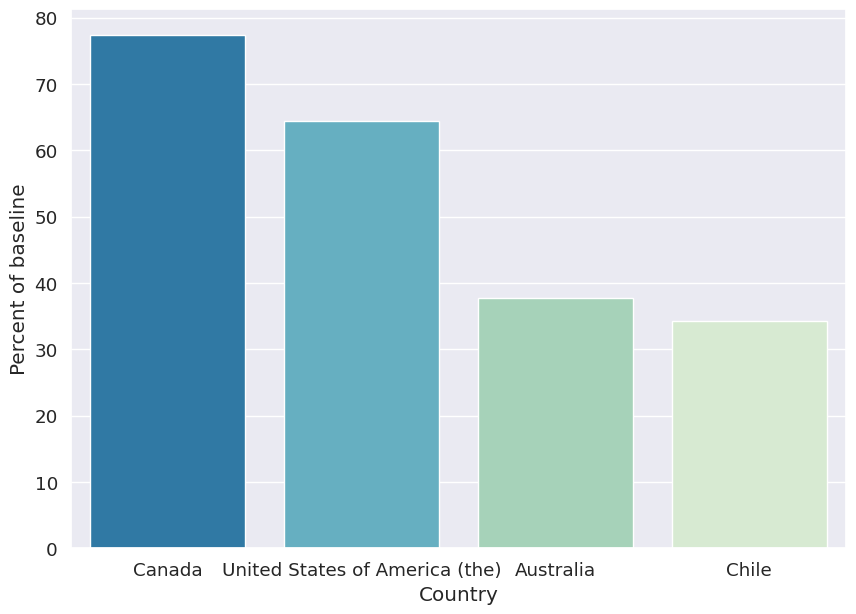

In [17]:
df5 = df4.groupby("Country")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,7])
sns.barplot(data = df5, x=  'Country', y = 'PercentOfBaseline',palette = 'GnBu_r')
plt.ylabel('Percent of baseline')

Text(0.5, 0, 'Percent of baseline')

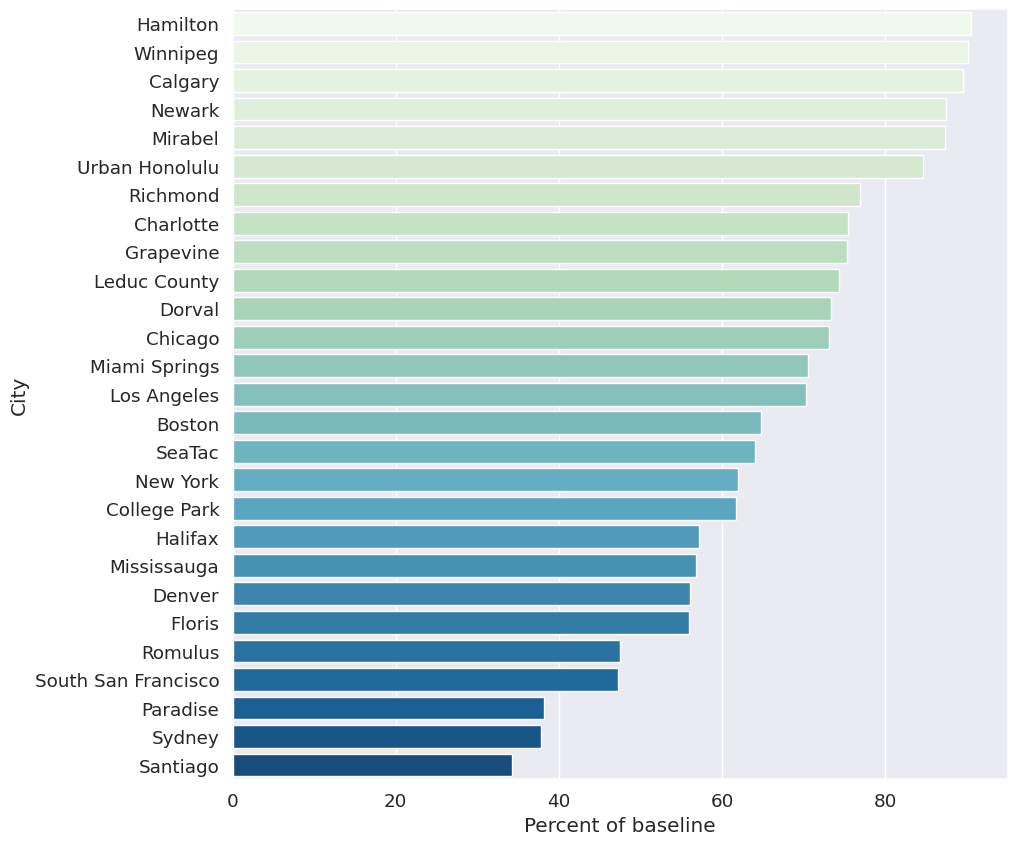

In [18]:
df6 = df4.groupby("City")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df6, x = 'PercentOfBaseline', y ='City',palette = 'GnBu')
plt.xlabel("Percent of baseline")

Text(0.5, 0, 'Percent of baseline')

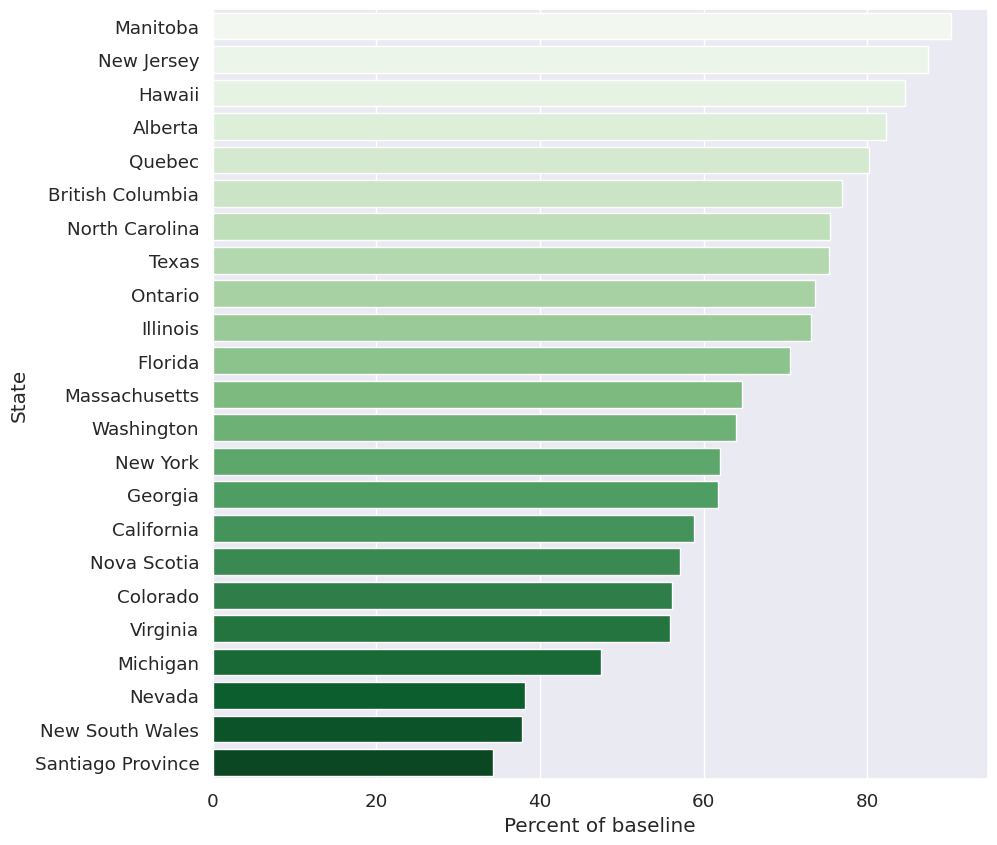

In [19]:
df7 = df4.groupby("State")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df7, x = 'PercentOfBaseline', y = 'State',palette = 'Greens')
plt.xlabel("Percent of baseline")

Text(0, 0.5, 'Airport name')

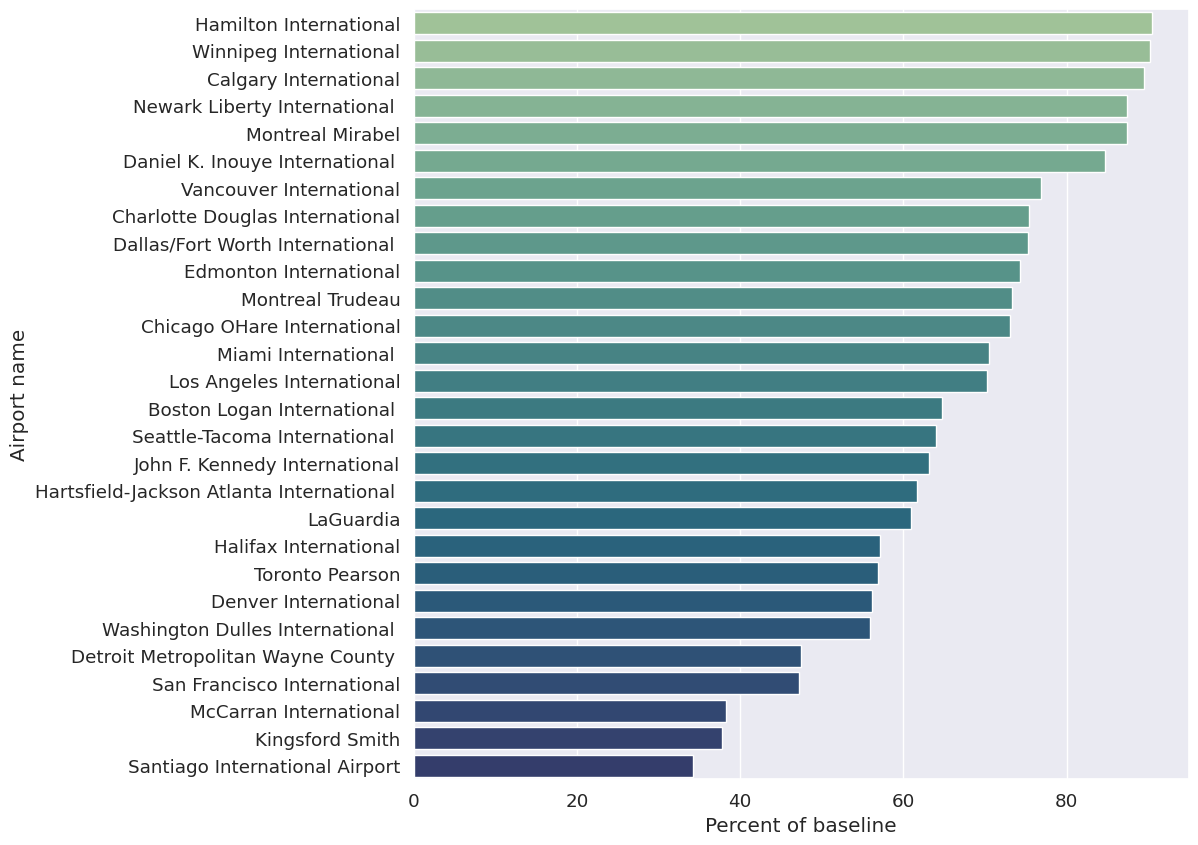

In [20]:
df8 = df4.groupby("AirportName")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df8, x = 'PercentOfBaseline', y = 'AirportName',palette = 'crest')
plt.xlabel('Percent of baseline')
plt.ylabel("Airport name")

In [22]:
df4["lon"] = df4.Centroid.apply(lambda x: x.split(" ")[0].replace("POINT("," "))
df4["lat"] = df4.Centroid.apply(lambda x: x.split(" ")[1].replace(")"," "))

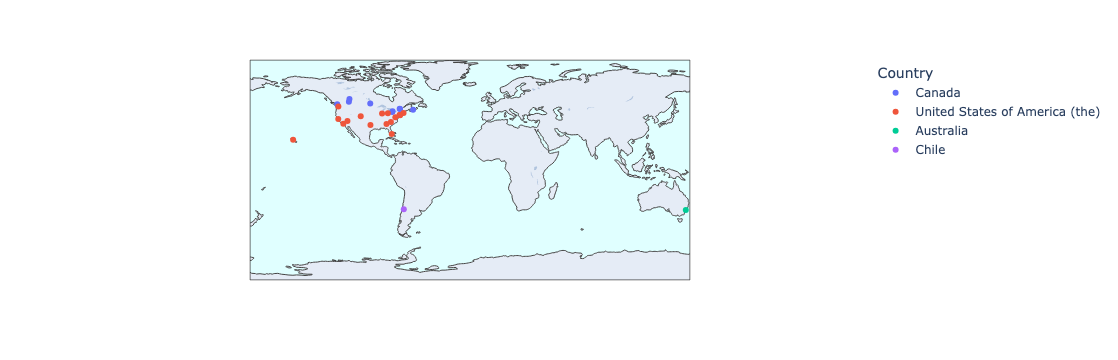

In [24]:
# Map
df9 = df4.groupby(["Country","City",'lat','lon'])['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
fig = px.scatter_geo(df9,
                     lat='lat',
                     lon='lon',
                     hover_name="Country",
                     color = 'Country',
                     hover_data = ['PercentOfBaseline',"City"],
                     labels = {"PercentOfBaseline":"Percent of Baseline"}
                     
                    )

fig.update_geos(showocean = True,
                oceancolor = 'LightCyan',
                lakecolor = 'LightSteelBlue',
                showlakes = True,
               
               )
fig.show()

In [30]:
%matplotlib inline

In [33]:
covid_impact_on_airport_traffic = df4
covid_impact_on_airport_traffic.head()

AggregationMethod        Date  Version      AirportName  PercentOfBaseline  \
0             Daily  2020-04-03      1.0  Kingsford Smith                 64   
1             Daily  2020-04-13      1.0  Kingsford Smith                 29   
2             Daily  2020-07-10      1.0  Kingsford Smith                 54   
3             Daily  2020-09-02      1.0  Kingsford Smith                 18   
4             Daily  2020-10-31      1.0  Kingsford Smith                 22   

                                    Centroid    City            State  \
0  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
1  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
2  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
3  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
4  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   

  ISO_3166_2    Country                                          Geography  \
0         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
1         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
2         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
3         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
4         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   

                 lon                 lat  
0   151.180087713813  -33.9459774986125   
1   151.180087713813  -33.9459774986125   
2   151.180087713813  -33.9459774986125   
3   151.180087713813  -33.9459774986125   
4   151.180087713813  -33.9459774986125

In [35]:
covid_impact_on_airport_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
 11  lon                7247 non-null   object 
 12  lat                7247 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 736.2+ KB


In [36]:
covid_impact_on_airport_traffic["Date"] = covid_impact_on_airport_traffic["Date"].map(lambda x: date.fromisoformat(x))

In [37]:
covid_impact_on_airport_traffic["weekday"] = covid_impact_on_airport_traffic["Date"].map(lambda x: x.weekday())
w_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
covid_impact_on_airport_traffic["weekday"] = [w_list[idx] for idx in covid_impact_on_airport_traffic["weekday"]]

In [38]:
def cut_long(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    long, _ = point[6:-1].split(" ")
    return float(long)

def cut_lat(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [39]:
covid_impact_on_airport_traffic["long"] = covid_impact_on_airport_traffic["Centroid"].map(cut_long)
covid_impact_on_airport_traffic["lat"] = covid_impact_on_airport_traffic["Centroid"].map(cut_lat)

In [40]:
need_columns = [col for col in covid_impact_on_airport_traffic.columns if not col in ["AggregationMethod", "Version", "Centroid"]]
covid_impact_on_airport_traffic = covid_impact_on_airport_traffic[need_columns]
covid_impact_on_airport_traffic.head()

Date      AirportName  PercentOfBaseline    City            State  \
0  2020-04-03  Kingsford Smith                 64  Sydney  New South Wales   
1  2020-04-13  Kingsford Smith                 29  Sydney  New South Wales   
2  2020-07-10  Kingsford Smith                 54  Sydney  New South Wales   
3  2020-09-02  Kingsford Smith                 18  Sydney  New South Wales   
4  2020-10-31  Kingsford Smith                 22  Sydney  New South Wales   

  ISO_3166_2    Country                                          Geography  \
0         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
1         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
2         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
3         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
4         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   

                 lon        lat weekday        long  
0   151.180087713813 -33.945977     Fri  151.180088  
1   151.180087713813 -33.945977     Mon  151.180088  
2   151.180087713813 -33.945977     Fri  151.180088  
3   151.180087713813 -33.945977     Wed  151.180088  
4   151.180087713813 -33.945977     Sat  151.180088

In [41]:
covid_impact_on_airport_traffic_unique = covid_impact_on_airport_traffic[~covid_impact_on_airport_traffic[["AirportName"]].duplicated()].reset_index(drop=True)
covid_impact_on_airport_traffic_unique

Date                                AirportName  PercentOfBaseline  \
0   2020-04-03                            Kingsford Smith                 64   
1   2020-03-17             Santiago International Airport                 72   
2   2020-04-05                      Calgary International                 65   
3   2020-04-20                     Edmonton International                 46   
4   2020-05-15                    Vancouver International                 68   
5   2020-05-27                     Winnipeg International                100   
6   2020-03-29                      Halifax International                 32   
7   2020-04-10                            Toronto Pearson                 10   
8   2020-08-10                     Hamilton International                100   
9   2020-09-16                           Montreal Mirabel                100   
10  2020-05-04                           Montreal Trudeau                 67   
11  2020-06-22                  Los Angeles International                 63   
12  2020-04-20                San Francisco International                 46   
13  2020-06-14                       Denver International                 30   
14  2020-04-18                       Miami International                  60   
15  2020-04-20  Hartsfield-Jackson Atlanta International                  51   
16  2020-05-16            Daniel K. Inouye International                  73   
17  2020-03-23                Chicago OHare International                 75   
18  2020-04-03                Boston Logan International                  56   
19  2020-04-08         Detroit Metropolitan Wayne County                  49   
20  2020-07-23            Charlotte Douglas International                100   
21  2020-08-07              Newark Liberty International                 100   
22  2020-04-26                     McCarran International                 22   
23  2020-03-16                                  LaGuardia                 95   
24  2020-05-26              John F. Kennedy International                 53   
25  2020-03-21           Dallas/Fort Worth International                  71   
26  2020-06-11           Washington Dulles International                  53   
27  2020-04-14              Seattle-Tacoma International                  62   

                   City              State ISO_3166_2  \
0                Sydney    New South Wales         AU   
1              Santiago  Santiago Province         CL   
2               Calgary            Alberta      CA-AB   
3          Leduc County            Alberta      CA-AB   
4              Richmond   British Columbia      CA-BC   
5              Winnipeg           Manitoba      CA-MB   
6               Halifax        Nova Scotia      CA-NS   
7           Mississauga            Ontario      CA-ON   
8              Hamilton            Ontario      CA-ON   
9               Mirabel             Quebec      CA-QC   
10               Dorval             Quebec      CA-QC   
11          Los Angeles         California      US-CA   
12  South San Francisco         California      US-CA   
13               Denver           Colorado      US-CO   
14        Miami Springs            Florida      US-FL   
15         College Park            Georgia      US-GA   
16       Urban Honolulu             Hawaii      US-HI   
17              Chicago           Illinois      US-IL   
18               Boston      Massachusetts      US-MA   
19              Romulus           Michigan      US-MI   
20            Charlotte     North Carolina      US-NC   
21               Newark         New Jersey      US-NJ   
22             Paradise             Nevada      US-NV   
23             New York           New York      US-NY   
24             New York           New York      US-NY   
25            Grapevine              Texas      US-TX   
26               Floris           Virginia      US-VA   
27               SeaTac         Washington      US-WA   

                           Country 

In [42]:
df_geometry = covid_impact_on_airport_traffic_unique[['AirportName', 'City', 'State',
                                                     'ISO_3166_2', 'Country', 'long', 'lat']]

In [43]:
def visualize_airport_map(df,  zoom):
    
    lat_map=30.038557
    lon_map=31.231781
    f = folium.Figure(width=1000, height=500)
    m = folium.Map([lat_map,lon_map], zoom_start=zoom).add_to(f)
        
    for i in range(0,len(df)):
        folium.Marker(location=[df["lat"][i],df["long"][i]],icon=folium.Icon(icon_color='white',icon ='plane',prefix='fa')).add_to(m)
        
    return m

In [44]:
visualize_airport_map(covid_impact_on_airport_traffic_unique, 1)

Text(0.5, 1.0, 'records for each airport')

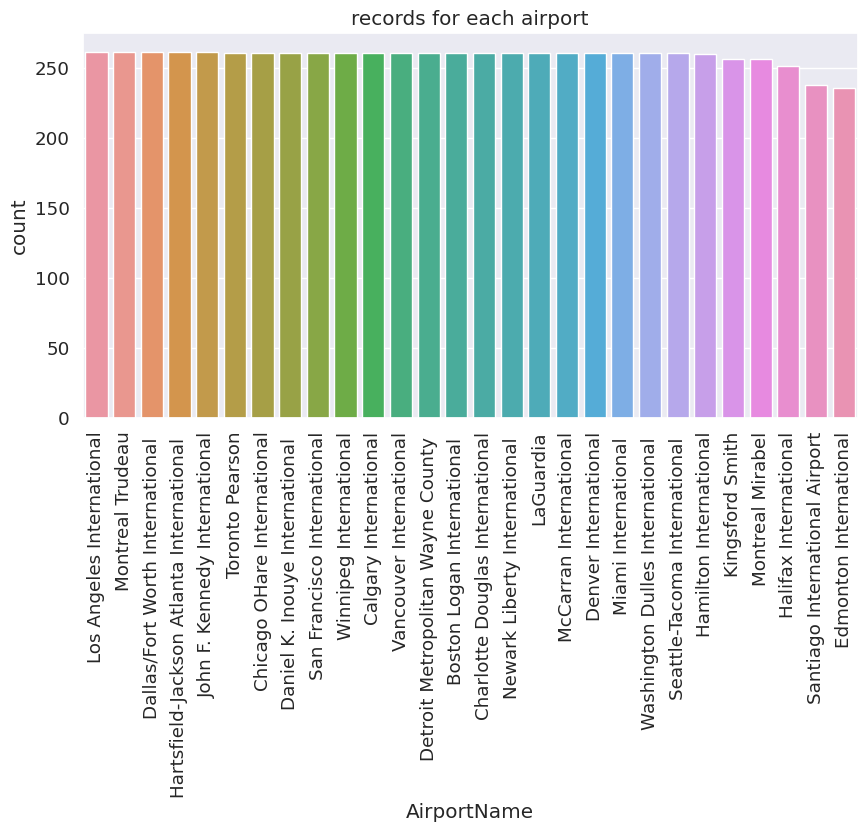

In [46]:
plt.figure(figsize=(10, 5))
g = sns.countplot(data=covid_impact_on_airport_traffic, x="AirportName",
              order = covid_impact_on_airport_traffic['AirportName'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each airport")

In [49]:
gdf = gpd.GeoDataFrame(covid_impact_on_airport_traffic_unique, 
                       geometry=gpd.points_from_xy(covid_impact_on_airport_traffic_unique.long, covid_impact_on_airport_traffic_unique.lat))
gdf.head()

Date                     AirportName  PercentOfBaseline  \
0  2020-04-03                 Kingsford Smith                 64   
1  2020-03-17  Santiago International Airport                 72   
2  2020-04-05           Calgary International                 65   
3  2020-04-20          Edmonton International                 46   
4  2020-05-15         Vancouver International                 68   

           City              State ISO_3166_2    Country  \
0        Sydney    New South Wales         AU  Australia   
1      Santiago  Santiago Province         CL      Chile   
2       Calgary            Alberta      CA-AB     Canada   
3  Leduc County            Alberta      CA-AB     Canada   
4      Richmond   British Columbia      CA-BC     Canada   

                                           Geography                 lon  \
0  POLYGON((151.164354085922 -33.9301772341877, 1...    151.180087713813   
1  POLYGON((-70.8043956756592 -33.3719683869737, ...   -70.7942372739446   
2  POLYGON((-113.981866836548 51.1392131913567, -...   -114.013122872131   
3  POLYGON((-113.568120002747 53.3110445425655, -...   -113.576260685047   
4  POLYGON((-123.136525154114 49.1980971490671, -...    -123.17754124324   

         lat weekday        long                     geometry  
0 -33.945977     Fri  151.180088  POINT (151.18009 -33.94598)  
1 -33.390727     Tue  -70.794237  POINT (-70.79424 -33.39073)  
2  51.118475     Sun -114.013123  POINT (-114.01312 51.11848)  
3  53.308783     Mon -113.576261  POINT (-113.57626 53.30878)  
4  49.193579     Fri -123.177541  POINT (-123.17754 49.19358)

In [50]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

/tmp/ipykernel_2943/913829029.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Text(0.5, 1.0, 'example world map')

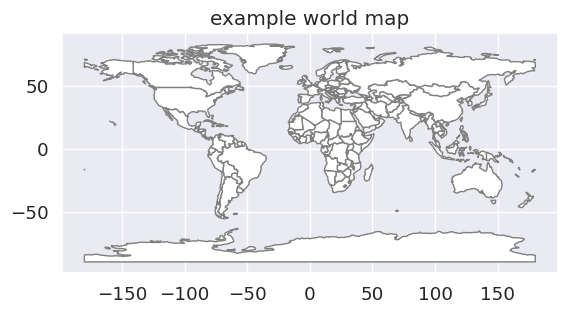

In [51]:
g = world.plot(color='white', edgecolor='gray')
g.set_title("example world map")

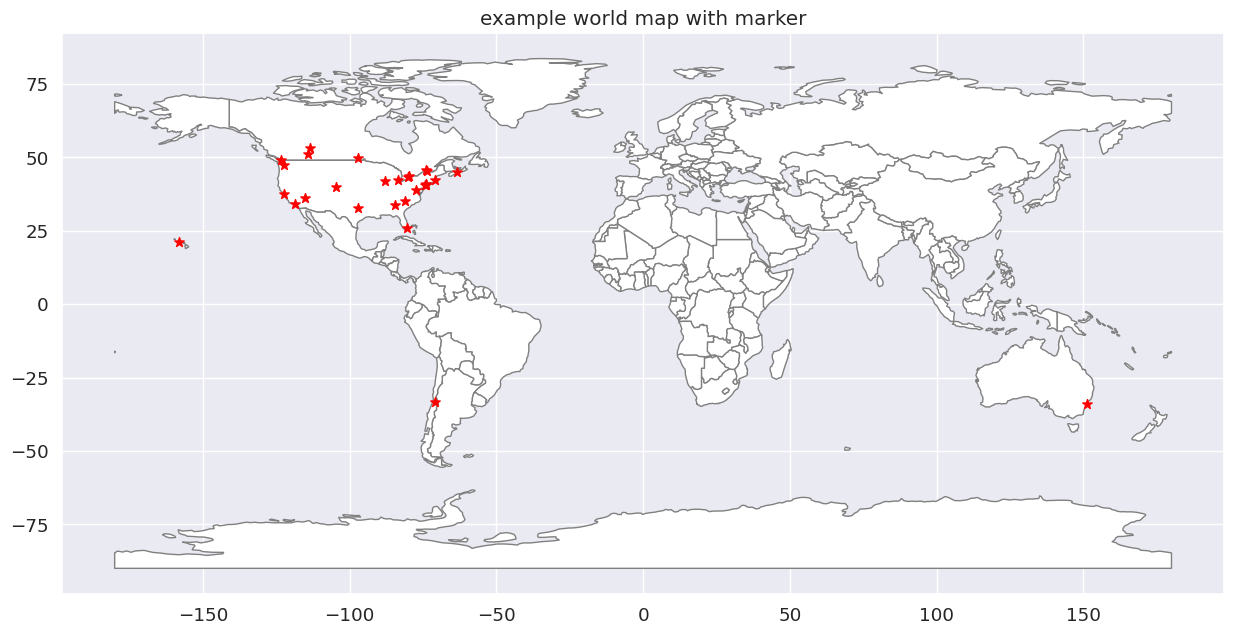

In [52]:
ax = world.plot(color='white', edgecolor='gray', figsize=(15, 10))
g = gdf.plot(ax=ax, marker='*', color='red', markersize=50)
g.set_title("example world map with marker")
plt.show()

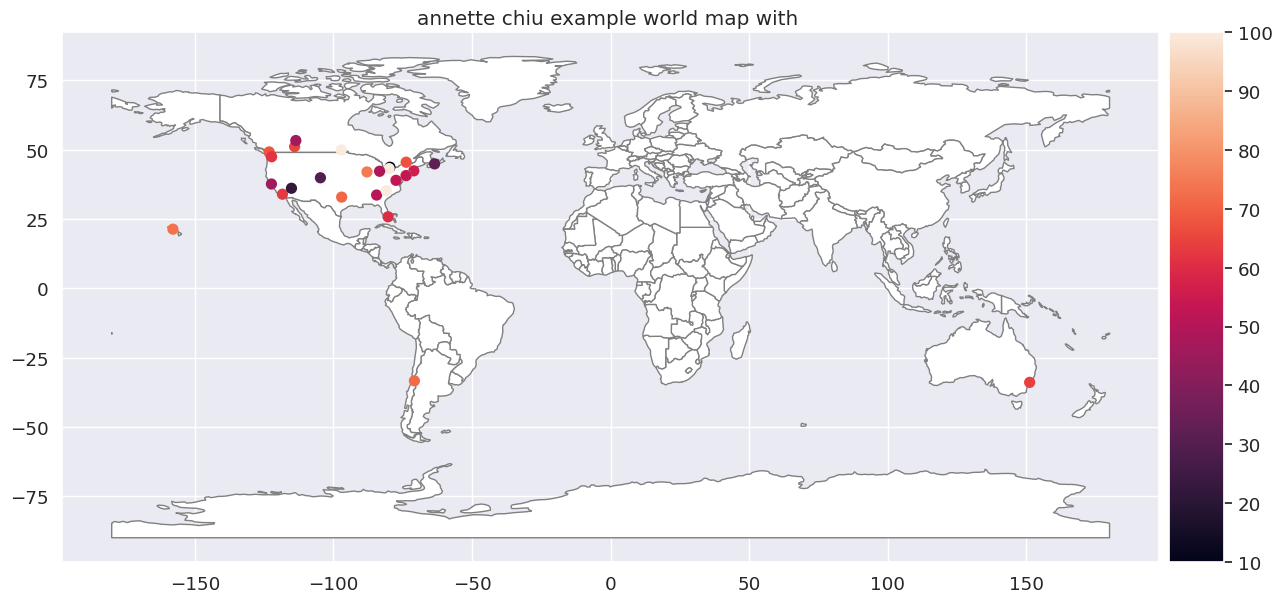

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = gdf.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("annette chiu example world map with ")
plt.show()